In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Question 4
### Loading Abalone dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load raw abalone dataset
abalone_df = pd.read_csv("D:/UWaterloo/ece657a/Assignment 2/abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

# Separate indep and dep features
X_abalone = abalone_df.iloc[:, 1:-1] # Removed the sex feature
y_abalone = abalone_df.iloc[:, -1]

# Normalize dataset 
sc1 = StandardScaler()
X_abalone = sc1.fit_transform(X_abalone)
X_abalone

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

## using PCA-preprocessing on abalone dataset

In [14]:
# Apply PCA on abalone dataset
pca = PCA(n_components=3)
abalone_pca = pca.fit_transform(X_abalone)
abalone_pca_df = pd.DataFrame(data=abalone_pca, columns=['PC1', 'PC2', 'PC3'])
abalone_pca_df

,PC1,PC2,PC3
0,-1.756019,-0.390532,-0.329928
1,-3.362734,-0.105153,0.252264
2,-0.482338,0.252055,-0.443918
3,-1.509041,0.207608,-0.000519
4,-3.654006,-0.272819,0.275035
...,...,...,...
4172,0.801361,0.385426,-0.064832
4173,0.719312,-0.329146,-0.293062
4174,2.167373,0.724010,0.402521
4175,1.647501,-0.305166,-0.306030


## using LDA-preprocessing on abalone dataset

In [15]:
# Apply LDA on raw abalone dataset
X_abalone_lda = X_abalone
y_abalone_lda = y_abalone
lda = LinearDiscriminantAnalysis(n_components=3)
X_abalone_lda = lda.fit(X_abalone_lda, y_abalone_lda).transform(X_abalone_lda)
abalone_lda_df = pd.DataFrame(X_abalone_lda, y_abalone_lda)
abalone_lda_df

,0,1,2
Rings,,,
15,-0.791003,-0.235208,0.359351
7,-2.355522,0.336978,0.214024
9,0.766719,-0.246564,1.129422
10,-0.611434,0.098075,0.230542
7,-2.674301,0.527509,0.102575
...,...,...,...
11,0.921330,-0.612381,-0.272399
10,0.425796,-0.894428,-0.034727
9,1.064523,-0.385654,-0.787231


## Loading wine dataset

In [16]:
wine_r = pd.read_csv("D:/UWaterloo/ece657a/Assignment 2/winequality-red.csv", sep=';')
wine_r["colour"]=1
wine_w = pd.read_csv("D:/UWaterloo/ece657a/Assignment 2/winequality-white.csv", sep=';')
wine_w["colour"]=0
wine_raw = pd.concat([wine_w,wine_r], ignore_index=True)
wine_raw.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,0
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,0
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,0
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,0


## using PCA-preprocessing on wine dataset

In [17]:
# Separate indep and dep features
X_wine1 = wine_raw.iloc[:, :-2]
y_wine = wine_raw.iloc[:, -2]
X_wine = pd.concat([X_wine1, wine_raw.iloc[:, -1]], axis=1)

# Normalize dataset 
sc2 = StandardScaler()
X_wine = sc2.fit_transform(X_wine)
X_wine.shape, y_wine.shape

# Apply PCA on wine dataset for dimensionality reduction
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_wine)
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PC1', 'PC2'])
wine_pca_df

,PC1,PC2
0,-2.185179,3.529983
1,-0.247707,-0.553177
2,-0.380592,0.365447
3,-1.735882,0.929351
4,-1.735882,0.929351
...,...,...
6492,2.699833,-0.854172
6493,2.524458,-1.161039
6494,2.775507,-0.761733
6495,2.984356,-0.767021


## using LDA-preprocessing on wine dataset

In [18]:
# Apply LDA on raw wine dataset
X_wine_lda = X_wine
y_wine_lda = y_wine
lda = LinearDiscriminantAnalysis(n_components=2)
X_wine_lda = lda.fit(X_wine_lda, y_wine_lda).transform(X_wine_lda)
wine_lda_df = pd.DataFrame(X_wine_lda, y_wine_lda)
print(wine_lda_df.shape)
wine_lda_df

(6497, 2)


,0,1
quality,,
6,0.752078,-1.466209
6,1.445150,0.392049
6,-0.123015,0.911451
6,0.288961,-0.721769
6,0.288961,-0.721769
...,...,...
5,0.512278,-0.224430
6,-0.514707,-0.597340
6,-0.231160,-0.831907


# Random Forest on Abalone dataset
#### Printing accuracy and best parameter for raw abalone dataset

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [20]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_abalone, y_abalone)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 8, 'n_estimators': 153}
Mean Accuracy: 0.277958055181503


To produce a plot showing the mean accuracy vs. the above parameter settings, we can use the following code:

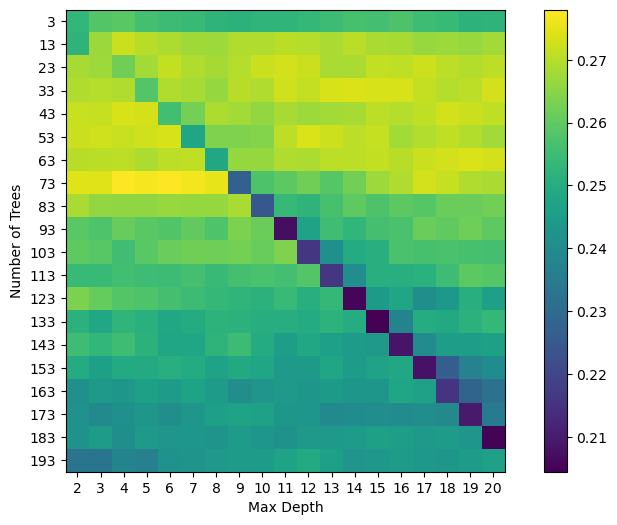

In [21]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

From the heat plot, we can see that the best mean accuracy is achieved with a maximum depth of 8 and 153 trees. from the above colorbar, we can see that if we go on increasing the max depth, which in turn would increase the number of trees which would result the model to overfit and the accuracy will drop. so to get the best parameters, we shall use the parameters that is best suited for the data.

# Random Forest on Wine - raw dataset:
#### Printing accuracy and best parameter for raw wine dataset

In [22]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_wine, y_wine)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 93}
Mean Accuracy: 0.5163887013679161


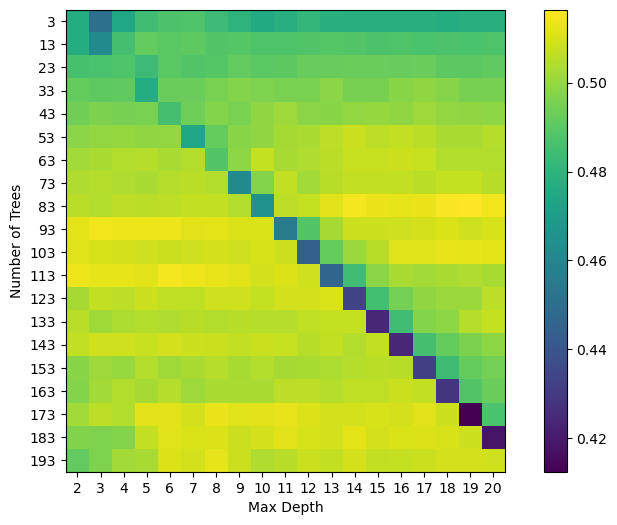

In [23]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

From the heat plot, we can see that the best mean accuracy is achieved with a maximum depth of 10 and 93 trees.

# Random Forest - Abalone PCA dataset

In [25]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(abalone_pca, y_abalone)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'n_estimators': 43}
Mean Accuracy: 0.26239606910580754


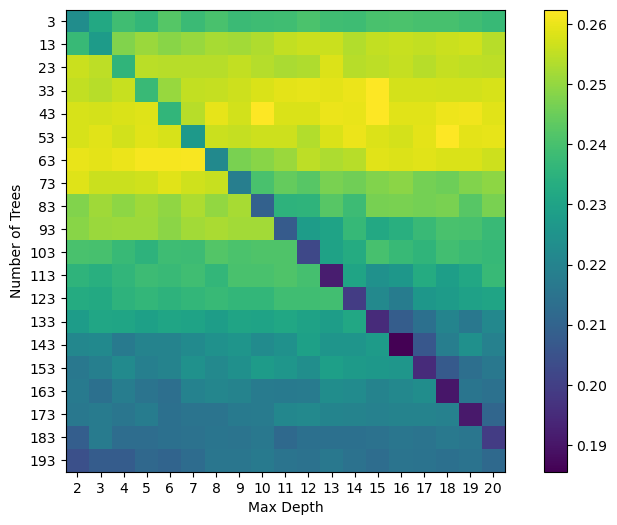

In [26]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

# Random Forest - Wine PCA dataset

In [27]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(wine_pca, y_wine)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'n_estimators': 73}
Mean Accuracy: 0.4341899686149109


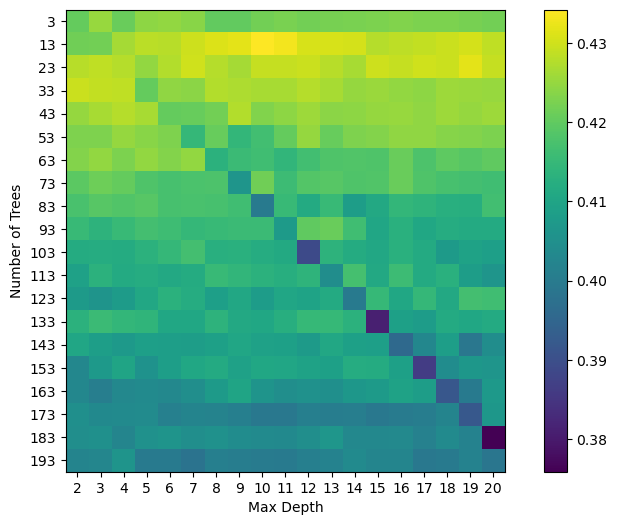

In [28]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

# Random Forest - Abalone LDA dataset

In [29]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_abalone_lda, y_abalone)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 7, 'n_estimators': 73}
Mean Accuracy: 0.26933701974042346


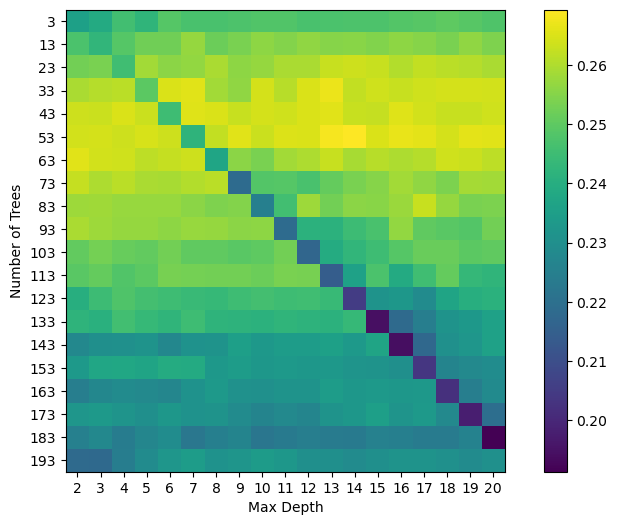

In [30]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

# Random Forest - Wine LDA dataset

In [31]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_wine_lda, y_wine)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'n_estimators': 73}
Mean Accuracy: 0.5422585420737845


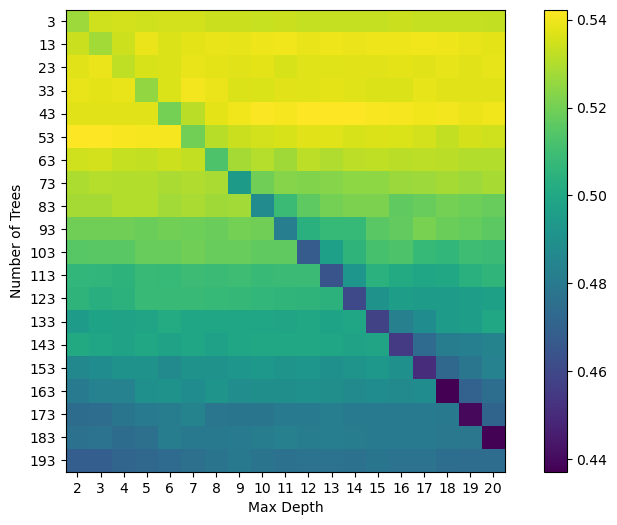

In [32]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

## Conclusion

PCA reduces the dimensionality of the data by creating new features that capture the most important variation in the data. This can help reduce overfitting and improve the generalization performance of the model. However, in this case, we see that the accuracy is lower than the raw data setting, which could indicate that some important information was lost during the PCA transformation.

LDA is a supervised dimensionality reduction technique that can be used to project the data onto a lower-dimensional space that maximizes class separation. This can help improve the accuracy of the model by reducing the amount of noise and irrelevant features in the data. In this case, we see that the accuracy is slightly higher than the raw data setting, indicating that LDA was able to capture important discriminative information for the classification task.